In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

### This is a playground!

Here you can quickly test some code, visualize your data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Project import Project

project = Project()

In [35]:
df = pd.read_csv(project.data_dir / 'train.csv', nrows=200)

In [52]:
df

,emotion,pixels
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...
195,4,"[[150, 147, 140, 138, 136, 134, 132, 128, 121,..."
196,3,"[[17, 12, 8, 9, 15, 13, 29, 25, 58, 130, 168, ..."
197,0,"[[42, 68, 58, 71, 61, 22, 26, 34, 45, 76, 110,..."
198,6,"[[21, 13, 4, 1, 3, 12, 24, 44, 57, 62, 55, 59,..."


In [36]:
def to_img(row):
    return np.array(list(map(lambda x: int(x), row.split(' ')))).reshape((48, 48))

In [37]:
df.pixels = df.pixels.apply(to_img)

In [38]:
df

,emotion,pixels
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,2,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,4,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,6,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."
...,...,...
195,4,"[[150, 147, 140, 138, 136, 134, 132, 128, 121,..."
196,3,"[[17, 12, 8, 9, 15, 13, 29, 25, 58, 130, 168, ..."
197,0,"[[42, 68, 58, 71, 61, 22, 26, 34, 45, 76, 110,..."
198,6,"[[21, 13, 4, 1, 3, 12, 24, 44, 57, 62, 55, 59,..."


<IPython.core.display.Javascript object>


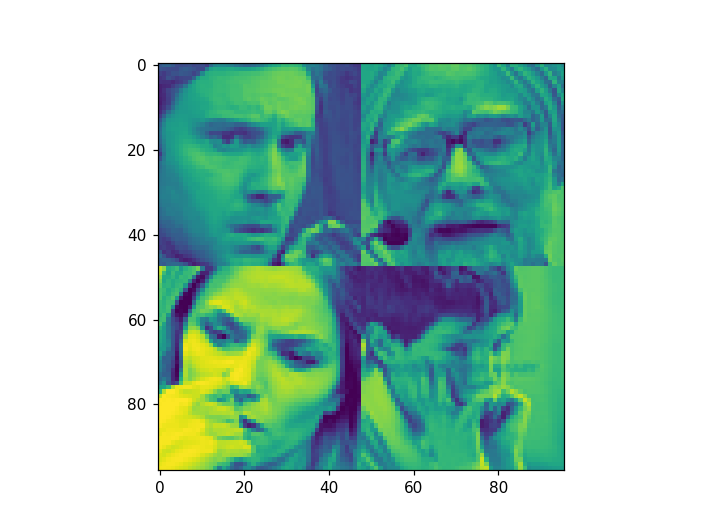

In [51]:
fig = plt.figure()
plt.imshow(np.vstack(
    [np.hstack(df.pixels[0:2]),
    np.hstack(df.pixels[2:4])]
))
